<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/PyTorch/%5B%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%ED%8A%9C%ED%86%A0%EB%A6%AC%EC%96%BC%5D_%EB%AC%B8%EC%9E%90_%EB%8B%A8%EC%9C%84_RNN%EC%9C%BC%EB%A1%9C_%EC%9D%B4%EB%A6%84_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os

In [ ]:
def findFiles(path) :
  return glob.glob(path)

In [ ]:
path = '/content/drive/MyDrive/알파코/data/names/*.txt'

print(findFiles(path))

['/content/drive/MyDrive/알파코/data/names/Greek.txt', '/content/drive/MyDrive/알파코/data/names/Russian.txt', '/content/drive/MyDrive/알파코/data/names/Polish.txt', '/content/drive/MyDrive/알파코/data/names/Scottish.txt', '/content/drive/MyDrive/알파코/data/names/Arabic.txt', '/content/drive/MyDrive/알파코/data/names/English.txt', '/content/drive/MyDrive/알파코/data/names/Dutch.txt', '/content/drive/MyDrive/알파코/data/names/Italian.txt', '/content/drive/MyDrive/알파코/data/names/German.txt', '/content/drive/MyDrive/알파코/data/names/Spanish.txt', '/content/drive/MyDrive/알파코/data/names/French.txt', '/content/drive/MyDrive/알파코/data/names/Japanese.txt', '/content/drive/MyDrive/알파코/data/names/Portuguese.txt', '/content/drive/MyDrive/알파코/data/names/Irish.txt', '/content/drive/MyDrive/알파코/data/names/Korean.txt', '/content/drive/MyDrive/알파코/data/names/Czech.txt', '/content/drive/MyDrive/알파코/data/names/Chinese.txt', '/content/drive/MyDrive/알파코/data/n

In [ ]:
import unicodedata
import string

In [ ]:
all_letters = string.ascii_letters + ' .,;"'
n_letters = len(all_letters)

In [ ]:
def unicodeToAscii(s):

  return ''.join(
      c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn'
      and c in all_letters
  )

In [ ]:
print(unicodeToAscii('Ślusàrski'))

Slusarski


In [ ]:
def readLines(filename):

  lines = open(filename, encoding='utf-8').read().strip().split('\n')
  return [unicodeToAscii(line) for line in lines]

In [ ]:
category_lines = {}
all_categories = []

for filename in findFiles(path):
  print(filename)
  category = os.path.splitext(os.path.basename(filename))[0]
  all_categories.append(category)
  lines = readLines(filename)
  print(lines)
  category_lines[category] = lines

/content/drive/MyDrive/알파코/data/names/Greek.txt
['Adamidis', 'Adamou', 'Agelakos', 'Akrivopoulos', 'Alexandropoulos', 'Anetakis', 'Angelopoulos', 'Antimisiaris', 'Antipas', 'Antonakos', 'Antoniadis', 'Antonopoulos', 'Antonopoulos', 'Antonopoulos', 'Arvanitoyannis', 'Avgerinos', 'Banos', 'Batsakis', 'Bekyros', 'Belesis', 'Bertsimas', 'Bilias', 'Blades', 'Bouloukos', 'Brisimitzakis', 'Bursinos', 'Calogerakis', 'Calpis', 'Chellos', 'Christakos', 'Christodoulou', 'Christou', 'Chrysanthopoulos', 'Chrysanthopoulos', 'Comino', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Close', 'Dalianis', 'Danas', 'Dasios', 'Demakis', 'Demarchis', 'Demas', 'Demetrious', 'Dertilis', 'Diakogeorgiou', 'Dioletis', 'Dounias', 'Dritsas', 'Drivakis', 'Eatros', 'Egonidis', 'Eliopoulos', 'Forakis', 'Fotopoulos', 'Fourakis', 'Frangopoulos', 'Galanopoulos', 'Garofalis', 'Gavril', 'Gavrilopoulos', 'Georgeakopoulos', 'Geracimos', 'Gianakopulos', 'Giannakopoulos', 'Giannakos', 'Glynatsis', 'Gomatos

In [ ]:
n_categories = len(all_categories)

In [ ]:
import torch

In [ ]:
def letterToIndex(letter):
    return all_letters.find(letter)

def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [ ]:
print(letterToTensor('J'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [ ]:
print(lineToTensor('Jones').size())

torch.Size([5, 1, 57])


In [ ]:
import torch.nn as nn

class RNN(nn.Module):

  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()

    self.hidden_size = hidden_size

    self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
    self.i2o = nn.Linear(input_size + hidden_size, output_size)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden):

    combined = torch.cat((input, hidden), 1)
    hidden = self.i2h(combined)
    output = self.i2o(combined)
    output = self.softmax(output)

    return output, hidden

  def initHidden(self):
    return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)

In [ ]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-2.9304, -2.9759, -2.9402, -2.9109, -2.8677, -2.9207, -2.8979, -2.8563,
         -2.9187, -2.8239, -2.8004, -2.8846, -2.9237, -2.9006, -2.8942, -2.8754,
         -2.7765, -2.9520]], grad_fn=<LogSoftmaxBackward0>)


In [ ]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()     
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('Chinese', 16)


In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)


category = Spanish / line = Jasso
category = Polish / line = Szwarc
category = Spanish / line = Tosell
category = Korean / line = Yeo
category = Greek / line = Totolos
category = Dutch / line = Aalst
category = Arabic / line = Shalhoub
category = Irish / line = Bradan
category = Arabic / line = Nahas
category = French / line = Joubert


In [ ]:
criterion = nn.NLLLoss()

In [ ]:
learning_rate = 0.005 # 이것을 너무 높게 설정하면 발산할 수 있고, 너무 낮으면 학습이 되지 않을 수 있습니다.

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # 매개변수의 경사도에 학습률을 곱해서 그 매개변수의 값에 더합니다.
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [ ]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# 도식화를 위한 손실 추적
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # iter 숫자, 손실, 이름, 추측 화면 출력
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # 현재 평균 손실을 전체 손실 리스트에 추가
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 5s) 3.2129 Morcos / Greek ✗ (Arabic)
10000 10% (0m 13s) 1.2541 Shadid / Arabic ✓
15000 15% (0m 20s) 0.9129 Lillis / Greek ✓
20000 20% (0m 25s) 2.1585 Petrezelka / Polish ✗ (Czech)
25000 25% (0m 31s) 2.0846 Araya / Japanese ✗ (Spanish)
30000 30% (0m 36s) 2.0674 Meindl / Czech ✗ (German)
35000 35% (0m 42s) 2.9734 Gosselin / Russian ✗ (French)
40000 40% (0m 47s) 1.1652 Khouri / Japanese ✗ (Arabic)
45000 45% (0m 52s) 1.5994 Costa / Spanish ✗ (Portuguese)
50000 50% (0m 57s) 0.2378 Kedzierski / Polish ✓
55000 55% (1m 2s) 0.5363 Giang / Vietnamese ✓
60000 60% (1m 7s) 0.9818 Ikina / Japanese ✓
65000 65% (1m 12s) 0.4870 Izumi / Japanese ✓
70000 70% (1m 17s) 0.3093 Cervenka / Czech ✓
75000 75% (1m 22s) 0.0278 Krakowski / Polish ✓
80000 80% (1m 27s) 0.4739 Scolaidhe / Irish ✓
85000 85% (1m 33s) 0.9480 Kawaii / Japanese ✓
90000 90% (1m 38s) 0.5893 Crawford / Scottish ✓
95000 95% (1m 43s) 0.0213 Nomikos / Greek ✓
100000 100% (1m 48s) 1.9955 Aita / Japanese ✗ (Italian)


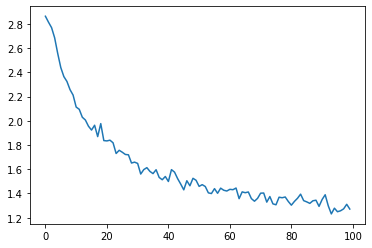

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

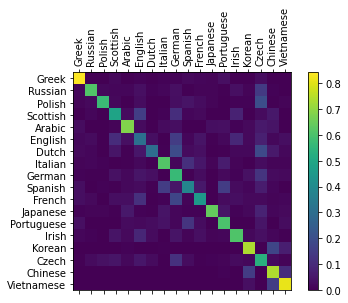

In [ ]:
# 혼란 행렬에서 정확한 추측을 추적
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# 주어진 라인의 출력 반환
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# 예시들 중에 어떤 것이 정확하게 예측되었는지 기록
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# 모든 행을 합계로 나누어 정규화
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# 도식 설정
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# 축 설정
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# 모든 tick에서 레이블 지정
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [ ]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.68) Czech
(-1.00) Russian
(-2.93) English

> Jackson
(-0.24) Scottish
(-2.22) English
(-2.95) Czech

> Satoshi
(-1.23) Japanese
(-1.88) Arabic
(-1.88) Italian
